# Problem Statement

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

**Description of fnlwgt (final weight)**

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1. A single cell estimate of the population 16+ for each state.

2. Controls for Hispanic Origin by age and sex.

3. Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
ds=pd.read_csv('census_income.csv')
df=pd.DataFrame(ds)
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.shape

(32560, 15)

We have 15 features including the target variable 'Income'. There are 32560 observations in the dataset.

In [4]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

Our target variable can have two values i.e. <=50K and >50K. So this is a Logistic Regression problem as the output can have only 2 values.

## Analysis of Data

In [5]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


- Age ranges from 17 to 90.
- The average age is 38, meaning on an average the value of this feature is 38.
- For Capital_gain, the mean is 1077 while the median is 0. This shows that the distribution is highly right-skewed.
- Capital gain has minimum value of 0 and even at 75th percentile, this value is 0. While the maximum value is very high 99999. This shows that data is concentrated from 75th percentile till maximum value. This results in large standard deviation of 7385.
- Capital loss is almost similar to Capital gain. The value is 0 till 75th percentile. 
- For capital loss, mean is 87 but median is 0. Data is right-skewed.
- Hours_per_week indicates the no of working hours for an individual in a week.
- Hours_per_week ranges from 1 to 99, and the average value is 40. This means that employees work for 40 hours per week on an average.
- 75% of the employees spend less than 45 hours.


The above analysis include only numerical variables. Lets analyse the categorical variables as well.

In [6]:
df.describe(include='object')

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27815,21789,29169,24719


- Income has two categories only, with maximumn no of values as <=50K. This indicates out of 32560, majority of people (24719) have annual income of less than or equal to 50K.
- There are 5 different categories of Race, but its baised to White with 27815 count.
- Native_country has maximum number of categories (42).
- Workclass is baised to Private with 22696 count out of total count of 32650.


## Checking Missing data

In [7]:
print("Missing in our dataset: ")
display(df.isnull().sum())

Missing in our dataset: 


Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Lets plot heatmap as well.

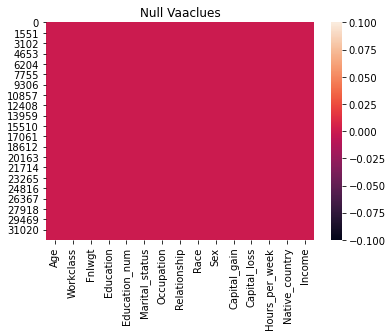

In [8]:
sns.heatmap(df.isnull())
plt.title('Null Vaaclues')
plt.show()

There are no missing values in the dataset.

## Plotting of data

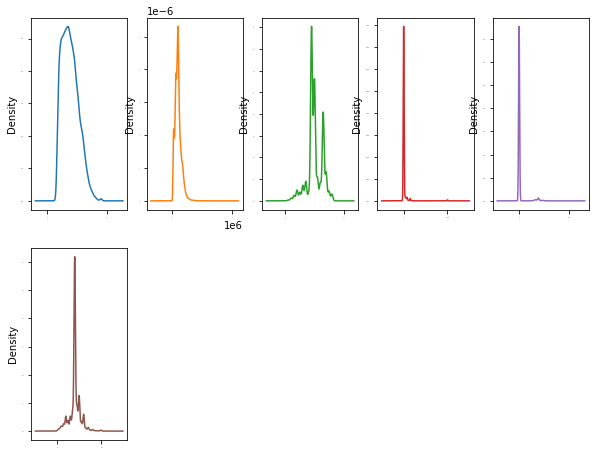

In [9]:
df.plot(kind='density',subplots=True,layout=(3,5),sharex=False, legend=False, fontsize=1,figsize=(10,12))
plt.show()

There is skewness in some columns. We will be handling this later on.

**Numerical Input Features**

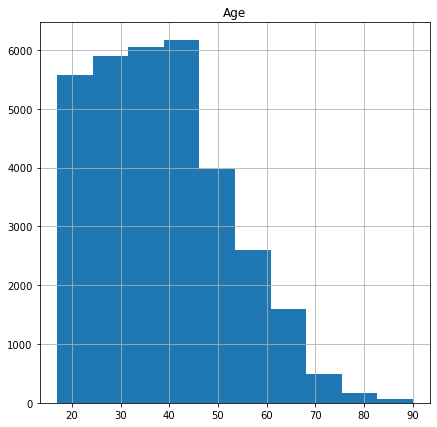

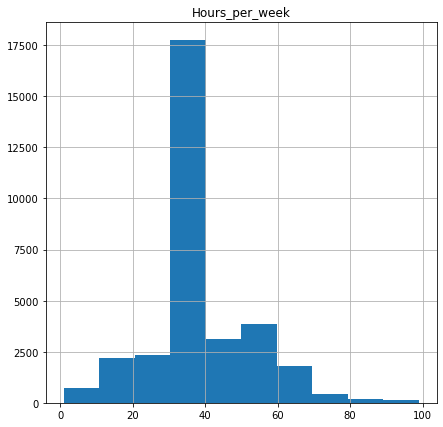

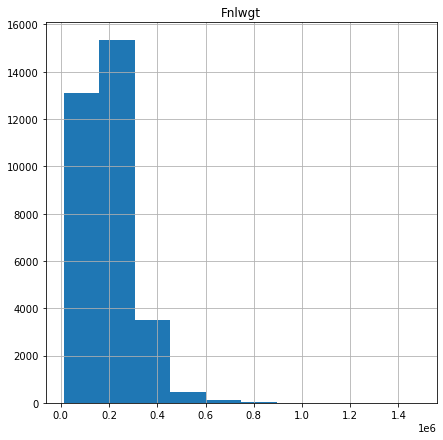

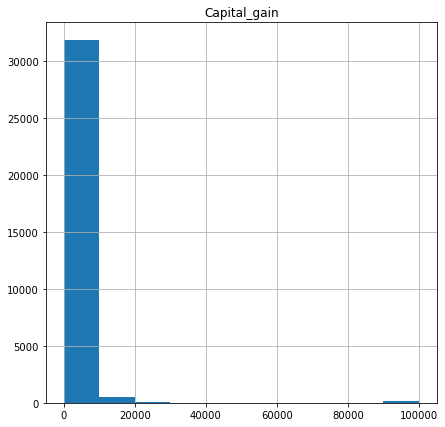

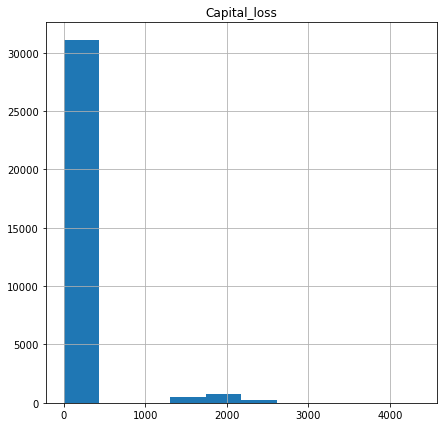

In [10]:
columns=['Age','Hours_per_week','Fnlwgt','Capital_gain','Capital_loss']
for i in columns:
    plt.figure()
    df[i].hist(figsize=(7,7))
    plt.title(i)

**Age**

In [11]:
df[df['Age']>60].shape

(2332, 15)

- The distribution is right skewed. 
- There are fewer observations for age > 60.

**Hours per week**

- Most population work for 30-40 hours per week.
- There are very few people who work for more than 80-100 hours per week.
- 75% of people work for less than 45 hours per week.

**Fnlwgt**

- The distribution seems to be right - skewed.

**Capital Gain**

- Most of the observations are centered on 0. Very few observations have value 10k and 99k.
- It shows that either a person has no gain (0) or it has high gain like 10k or 99k.


**Capital Loss**

- The feature is most similar to Capital Gain. Most of the values are 0.
- Only few values are non-zero.


In [12]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

**Categorical Input Features**

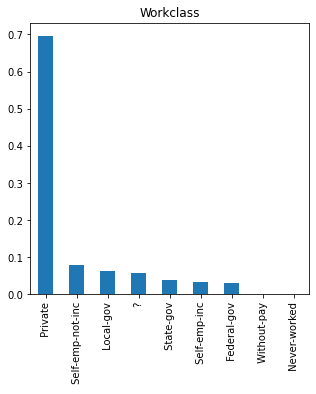

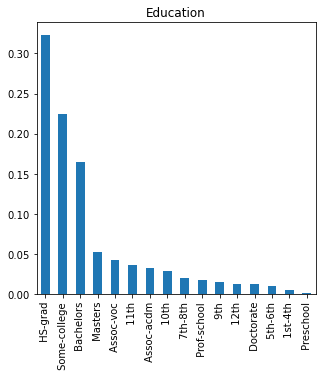

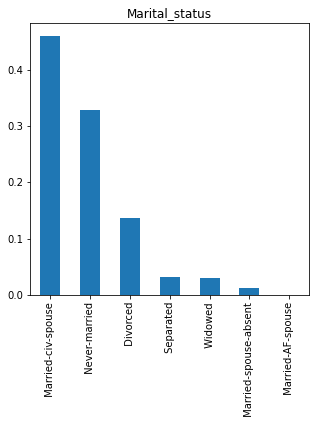

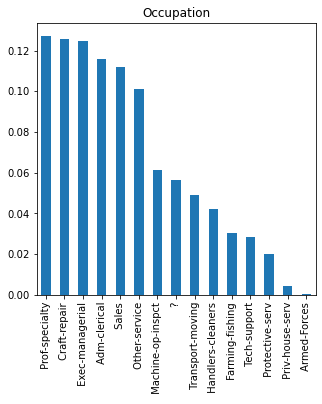

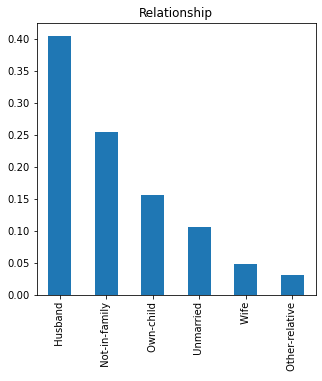

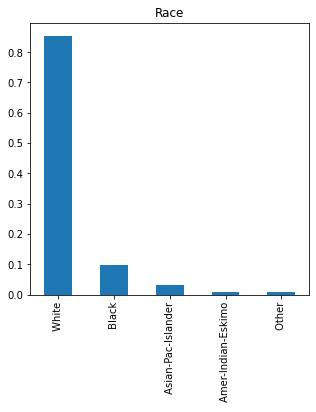

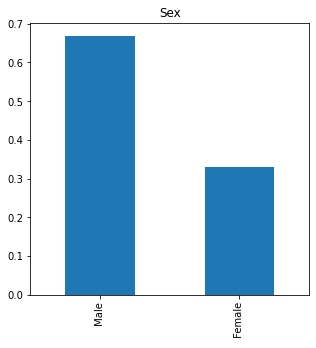

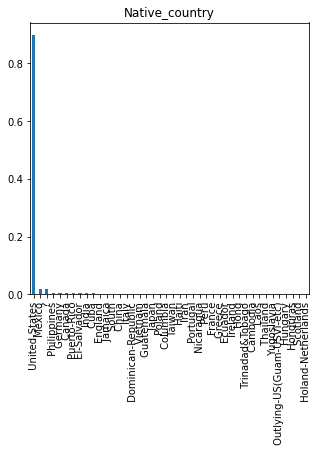

In [13]:
cat_col=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country']
for i in cat_col:
    plt.figure()
    df[i].value_counts(normalize=True).plot.bar(figsize=(5,5),title=i)

**Workclass**
- It has 9 different categories.
- Most of them work in Private (around 70%), so this is baised to Private.

**Education**
- Most of them are HS-grad.

**Marital Status**
- It has 7 unique categories.
- 'Married-civ-spouse' and 'Never-married' are two most dominent categories.
- 'Married-civ-spouse' has maximum no of count while 'Married-AF-spouse' has minimum count.

**Occupation**
- There are 14 unique categories present in the occupation attribute.
- 'Prof-specialty' has the maximum count.  
- Armed-Forces has minimum samples in the occupation attribute.

**Relationship**
- It has 6 unique categories.
- The most frequently occuring value is Husband.

**Race**
- There are 5 different races.
- Most of them is White (more than 80%).
- The second most common race is Black, which is even less than 10%.

**Gender**
- It has 2 values - Male and Female.
- Male are much higher in count than females.


**Output Variable - Income**

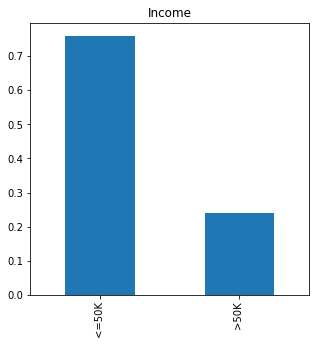

In [14]:
df['Income'].value_counts(normalize=True).plot.bar(figsize=(5,5),title='Income')
plt.show()

- Most of the people have Income less than or equal to 50K.
- More than 75% people have income more than 75% while less than 25% people have income more than 50K.
- We can say that this is not a balanced dataset as most of the observations are baised towards income less than or equal to 50K.

<Figure size 432x288 with 0 Axes>

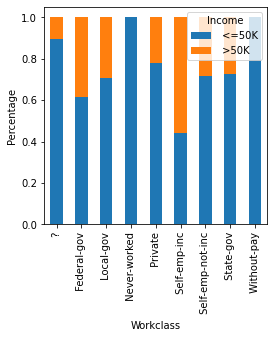

<Figure size 432x288 with 0 Axes>

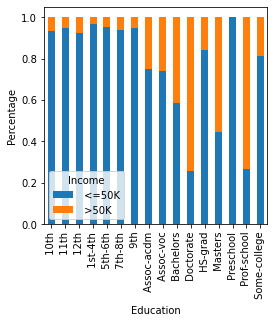

<Figure size 432x288 with 0 Axes>

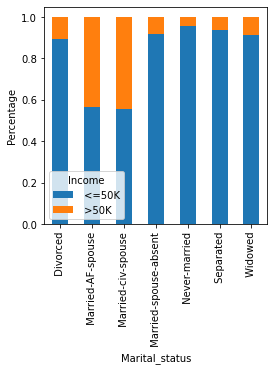

<Figure size 432x288 with 0 Axes>

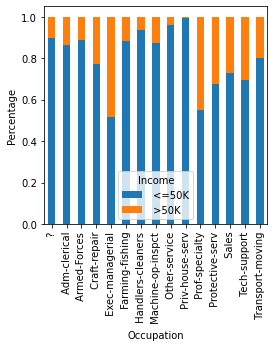

<Figure size 432x288 with 0 Axes>

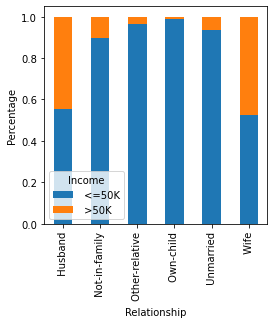

<Figure size 432x288 with 0 Axes>

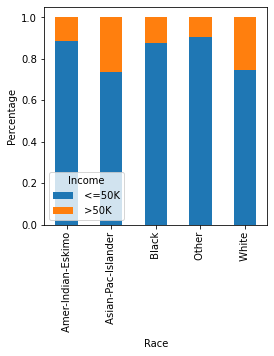

<Figure size 432x288 with 0 Axes>

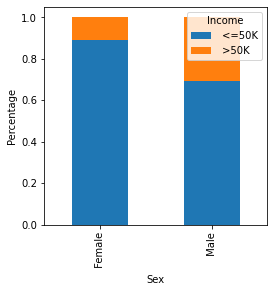

<Figure size 432x288 with 0 Axes>

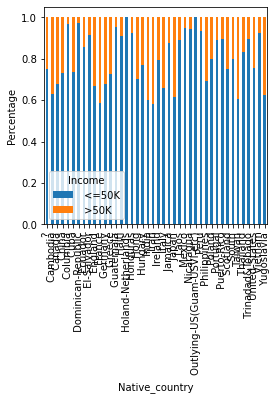

In [15]:
#categorical independent variables bivariate analysis
for i in cat_col:
    col=pd.crosstab(df[i],df['Income'])
    plt.figure()
    col.div(col.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
    plt.xlabel(i)
    p = plt.ylabel('Percentage')
    

Income
 <=50K    36.783648
 >50K     44.249841
Name: Age, dtype: float64
Income
 <=50K    38.840163
 >50K     45.473026
Name: Hours_per_week, dtype: float64
Income
 <=50K    190345.429467
 >50K     188005.000000
Name: Fnlwgt, dtype: float64
Income
 <=50K     148.670537
 >50K     4006.142456
Name: Capital_gain, dtype: float64
Income
 <=50K     53.145071
 >50K     195.001530
Name: Capital_loss, dtype: float64


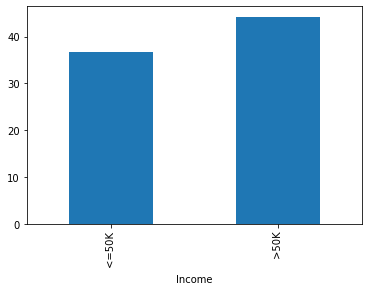

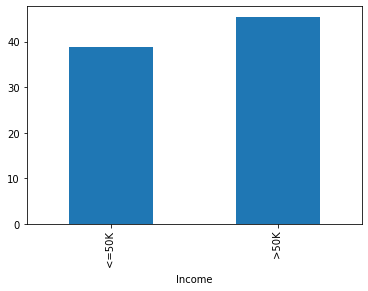

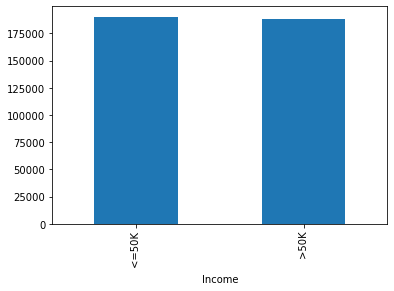

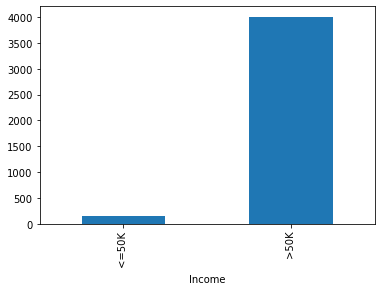

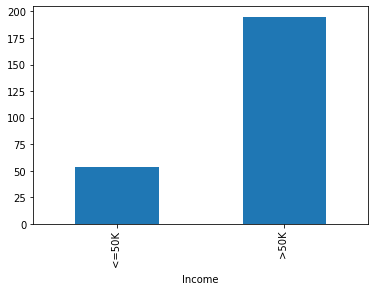

In [16]:
#numerical independent variables bivariate analysis

for i in columns:
    plt.figure()
    print(df.groupby('Income')[i].mean())
    df.groupby('Income')[i].mean().plot.bar()
    

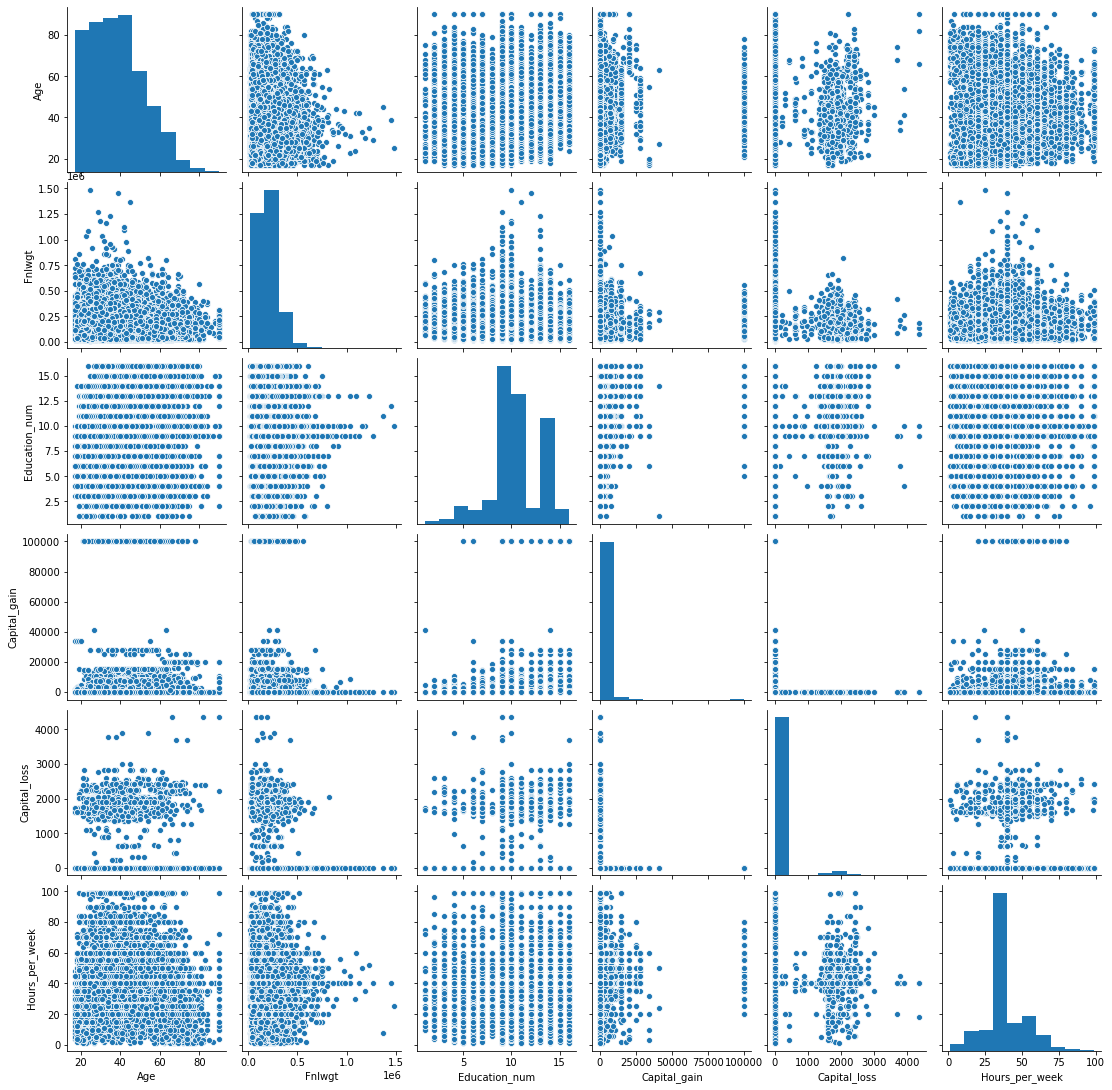

In [17]:
sns.pairplot(df)

## Converting Categorical Variables into Numeric Variables

In [18]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [19]:
df_cat=df.select_dtypes(include='object')
df_cat

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32556,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32557,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32558,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df_cat:
    df[i]=le.fit_transform(df[i])

In [21]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


## Checking Correlation

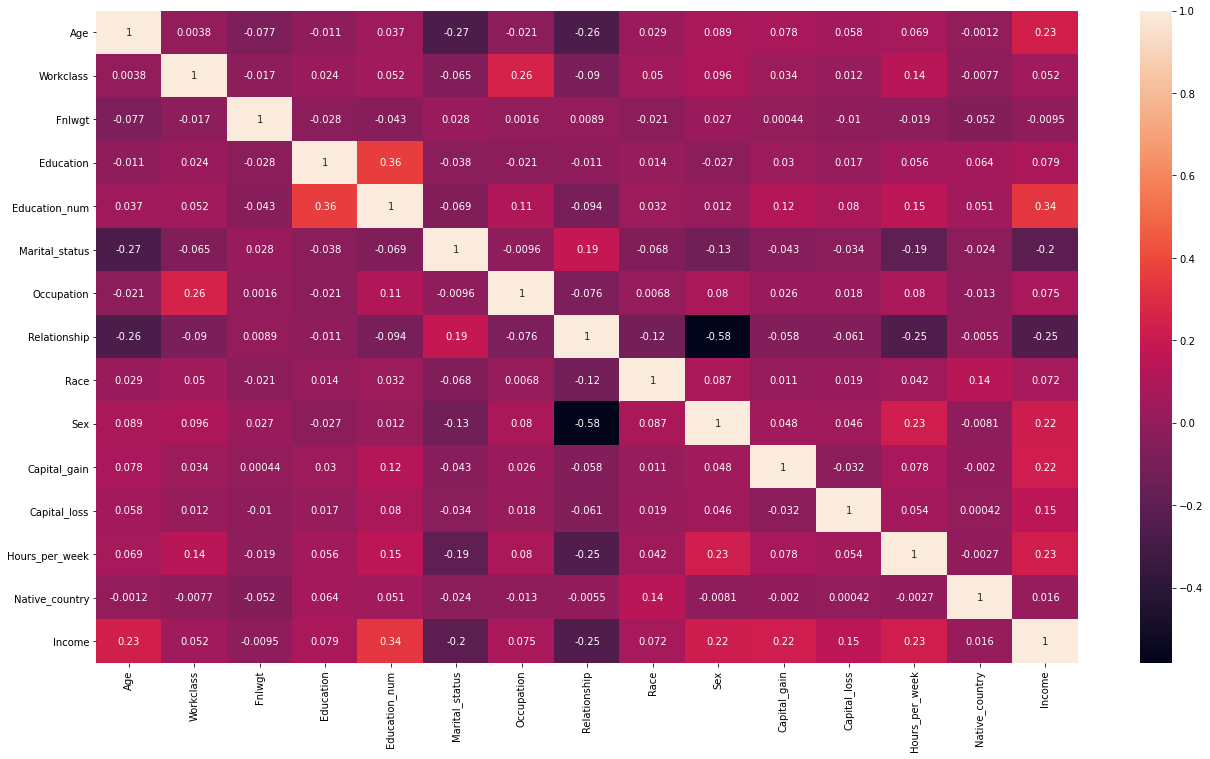

In [22]:
corr_mat=df.corr()
plt.figure(figsize=(22,12))
sns.heatmap(corr_mat,annot=True)
plt.show()

In [23]:
corr_matrix=df.corr()
corr_matrix['Income'].sort_values(ascending=False)

Income            1.000000
Education_num     0.335182
Age               0.234039
Hours_per_week    0.229690
Capital_gain      0.223333
Sex               0.215995
Capital_loss      0.150523
Education         0.079311
Occupation        0.075448
Race              0.071853
Workclass         0.051645
Native_country    0.015845
Fnlwgt           -0.009481
Marital_status   -0.199295
Relationship     -0.250924
Name: Income, dtype: float64

POSITIVE CORRELATION: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation. We can see some variables have positive correlation with the target variable.

NEGATIVE CORRELATION: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation. We can see some variables have negative correlation with the target variable

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

Now from the above heatmap,we can see that the features are not much correlated. So we can carry on with all features.

Education is the most closely related to the target variable. Other features like Relationship and Age also impact the Income.

## Handling Outliers

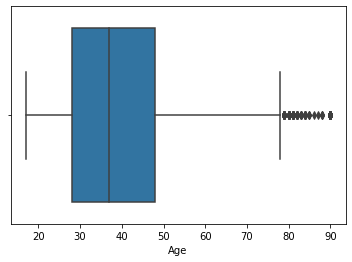

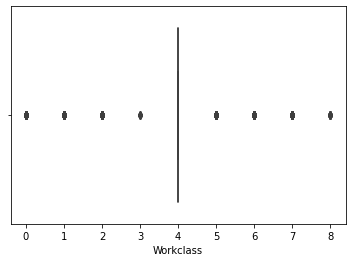

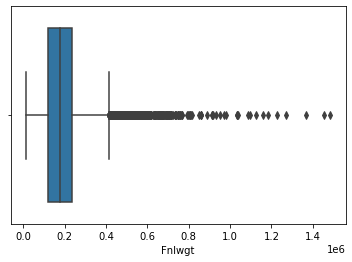

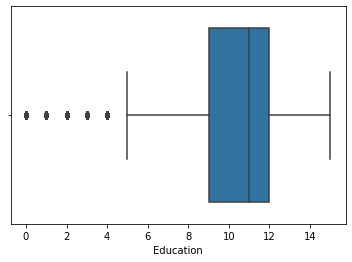

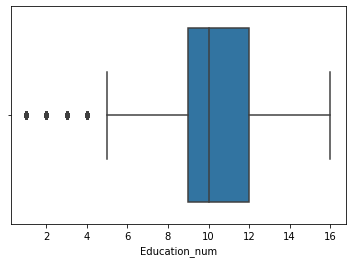

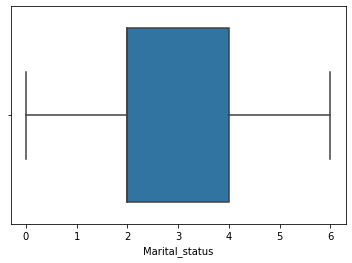

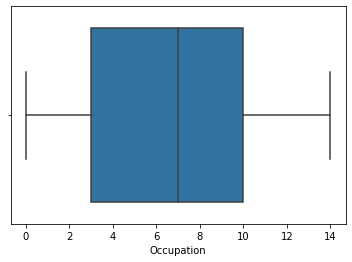

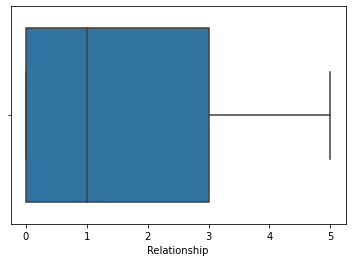

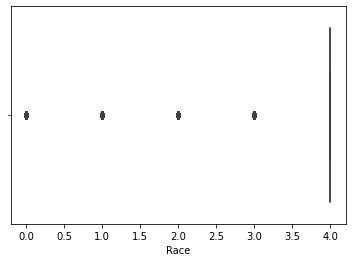

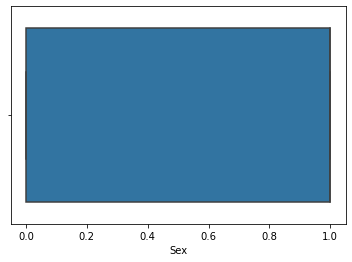

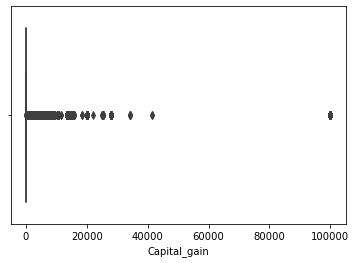

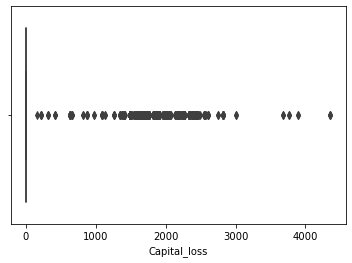

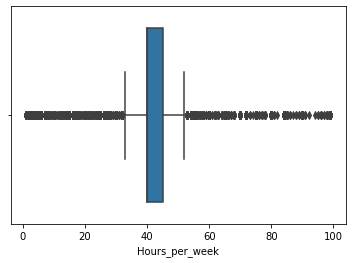

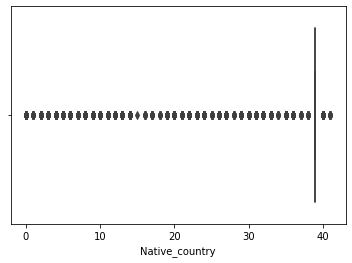

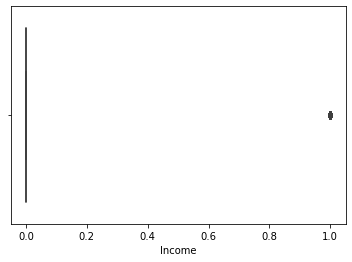

In [24]:
for i in df.columns:
    plt.figure()
    sns.boxplot(df[i])

There are outliers present in many columns. Lets calculate the z score for these outliers and remove the outliers depending on z score.

Z-score indicates how far a particular data point is away from the mean. If z score is high for a datapoint, it means it is too distant from the mean, so should be removed considering an outlier..

In [25]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [26]:
z

array([[0.83709708, 1.46388339, 1.0087417 , ..., 2.22212013, 0.29157343,
        0.5632099 ],
       [0.04264043, 0.09012148, 0.24504633, ..., 0.03542999, 0.29157343,
        0.5632099 ],
       [1.05703146, 0.09012148, 0.42576955, ..., 0.03542999, 0.29157343,
        0.5632099 ],
       ...,
       [1.42358875, 0.09012148, 0.3588108 , ..., 0.03542999, 0.29157343,
        0.5632099 ],
       [1.21562378, 0.09012148, 0.11092744, ..., 1.65520046, 0.29157343,
        0.5632099 ],
       [0.98372   , 0.77700244, 0.92986178, ..., 0.03542999, 0.29157343,
        1.77553698]])

In [27]:
df_new=df[(z<3).all(axis=1)]
df.shape, df_new.shape

((32560, 15), (27417, 15))

We have now removed the outliers from our dataset.

## ML Model Development

In [29]:
#Finding best random_state
x=df_new.drop('Income',axis=1)
y=df_new['Income']

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
maxAccu=0
maxRS=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    
print('Best accuracy is ',maxAccu, 'on random state ',maxRS)
    

Best accuracy is  0.8186238755166545 on random state  74


**Building the model**

Let's try different algorithms and find out the accuracy for each model. We will also consider the cross validation score to check if the accuracy is due to overfitting.

The model with high accuracy and low difference between accuracy score and cross validation score will be considered as the best fit model.

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=74)

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

model_classify = [RandomForestClassifier(n_estimators=100),KNeighborsClassifier(n_neighbors = 5),GaussianNB() ,LinearSVC(), DecisionTreeClassifier(),AdaBoostClassifier(),LogisticRegression()]
df_result=pd.DataFrame(columns=['Model','Accuracy','Cross Validation Score','Difference'])


for model in model_classify:
    m = model
    test_string=str(m)
    spl_word='('
    print('Model: ',m)
    m.fit(x_train, y_train)
    pred = m.predict(x_test)
    acc=accuracy_score(y_test,pred)
    acc_final=acc*100
    print('Score: ', acc_final)
    scr=cross_val_score(m,x,y,cv=5)
    scr_final=(scr.mean())*100
    print('Cross validation score: ',scr_final)
    diff=((acc*100)-scr_final)
    print('Difference between cross validation score and accuracy is ', diff)
    print('Confusion matrix: ', confusion_matrix(y_test,pred))
    print('Classification report: ', classification_report(y_test,pred))
    print('------------------------------------------------')
    df_result=df_result.append({'Model':test_string,'Accuracy':acc_final,'Cross Validation Score':scr_final,'Difference':diff}, ignore_index=True)
    

Model:  RandomForestClassifier()
Score:  85.36348164356917
Cross validation score:  85.03120446688011
Difference between cross validation score and accuracy is  0.3322771766890611
Confusion matrix:  [[5981  477]
 [ 727 1041]]
Classification report:                precision    recall  f1-score   support

           0       0.89      0.93      0.91      6458
           1       0.69      0.59      0.63      1768

    accuracy                           0.85      8226
   macro avg       0.79      0.76      0.77      8226
weighted avg       0.85      0.85      0.85      8226

------------------------------------------------
Model:  KNeighborsClassifier()
Score:  79.44322878677364
Cross validation score:  78.5242762823836
Difference between cross validation score and accuracy is  0.9189525043900488
Confusion matrix:  [[6035  423]
 [1268  500]]
Classification report:                precision    recall  f1-score   support

           0       0.83      0.93      0.88      6458
           1      

In [33]:
df_result

,Model,Accuracy,Cross Validation Score,Difference
0,RandomForestClassifier(),85.363482,85.031204,0.332277
1,KNeighborsClassifier(),79.443229,78.524276,0.918953
2,GaussianNB(),81.412594,80.329741,1.082853
3,LinearSVC(),26.002918,79.910254,-53.907337
4,DecisionTreeClassifier(),80.646730,80.563156,0.083574
5,AdaBoostClassifier(),86.360321,85.895639,0.464682
6,LogisticRegression(),81.862388,80.231246,1.631142


- We can see that AdaBoostClassifier has maximum accuracy with minimum difference between accuracy and cross validation score. So this will be considered as the best fit model.

- AdaBoostClassifier (Adaptive Boosting) is a Boosting technique used to combine multiple classifier to increase the accuracy of classifiers.
- The most important parameters are n_estimators, base_estimator and learning_rate.
- We have not provided any base_estimator, so by deafult it is considering Decision Tree Classifier.

In [34]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
pred = ada.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy is ',acc*100)

Accuracy is  86.36032093362509


**Feature Importance**

Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

Feature importance scores play an important role in a predictive modeling project, including providing insight into the data, insight into the model, and the basis for dimensionality reduction and feature selection that can improve the efficiency and effectiveness of a predictive model on the problem.

Sklearn measures a feature importance by looking at how much the tree nodes uses that feature, reduced impurity on average (across all trees in the forest). It computes this score automatically for each feature after training and scales the results so that the sum of all importances is equal to 1.

In [35]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(ada.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Occupation,0.20
Capital_gain,0.20
Age,0.12
Relationship,0.12
Education_num,0.08
Hours_per_week,0.06
Workclass,0.04
Fnlwgt,0.04
Education,0.04


Now lets plot a graph for these values.

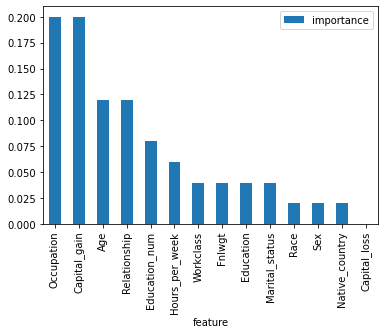

In [36]:
importances.plot.bar()

We can see the importances of each column in descreasing order in the above graph.

## Hyper Parameter Tuning

In [37]:
from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2,10, 50, 100, 500],
              "learning_rate": [10, 50, 100, 500]
             }




DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "balanced",max_depth = None)

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, cv=5)

In [85]:
grid_search_ABC.fit(x_train,y_train)
grid_search_ABC.best_params_

{'base_estimator__criterion': 'entropy',
 'base_estimator__splitter': 'best',
 'learning_rate': 500,
 'n_estimators': 10}

**Testing the model with best fit parameters**

In [89]:
DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "balanced",max_depth = None, criterion='entropy',splitter='best')
AdaModel = AdaBoostClassifier(base_estimator = DTC, n_estimators=10 , learning_rate=500)
AdaModel.fit(x_train,y_train)
pred = AdaModel.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))

0.8206904935570144
[[5690  768]
 [ 707 1061]]


Our model is giving accuracy of 82, which is good.

**Confusion Matrix**

A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

In [90]:
predictions = cross_val_predict(AdaModel, x_train, y_train, cv=3)
confusion_matrix(y_test, pred)

array([[5690,  768],
       [ 707, 1061]], dtype=int64)

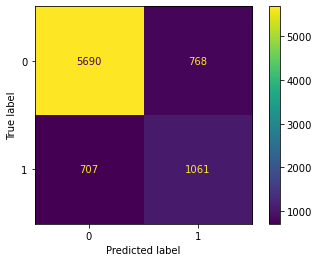

In [91]:
import sklearn
sklearn.metrics.plot_confusion_matrix(AdaModel,x_test,y_test)

From the above plotting, we can see that 5690 is True Positive Value and 1061 is the True Negative Value.
768 and 707 are error terms and represent False Positive and False Negative respectively.
This indicates that 768 people who did not actually earn more than 50K per year are predicted wrong and 707 people who actually earn more than 50K per year are predicted wrong.

**Precision and Recall**

Precision is a useful metric in cases where False Positive is a higher concern than False Negatives.

Recall is a useful metric in cases where False Negative trumps False Positive.

In [103]:
# Precision and Recall:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

y_score=AdaModel.decision_function(x_test)
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: ', average_precision)

Precision: 0.5740525459195536
Recall: 0.5649885583524027
Average precision-recall score:  0.43407166797860636


This indicates that the model predicts 43% of the time correctly (precision).

**F1 score**

F1-score is a harmonic mean of Precision and Recall, and so it gives a combined idea about these two metrics. It is maximum when Precision is equal to Recall.

But there is a catch here. The interpretability of the F1-score is poor. This means that we don’t know what our classifier is maximizing – precision or recall? So, we use it in combination with other evaluation metrics which gives us a complete picture of the result.

In [93]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.5694844885249684

There we have it, around 56 % F-score. The score is not that high, because we have a recall and precision of around 57% only. But unfortunately the F-score is not perfect, because it favors classifiers that have a similar precision and recall. This is a problem, because you sometimes want a high precision and sometimes a high recall. The thing is that an increasing precision, sometimes results in an decreasing recall and vice versa (depending on the threshold). This is called the precision/recall tradeoff.

Precision Recall Curve

For each employee the algorithm has to classify, it computes a probability based on a function and it classifies the person will leave (when the score is bigger the than threshold) or as will not leave (when the score is smaller than the threshold). That’s why the threshold plays an important part. We will plot the precision and recall with the threshold using matplotlib:

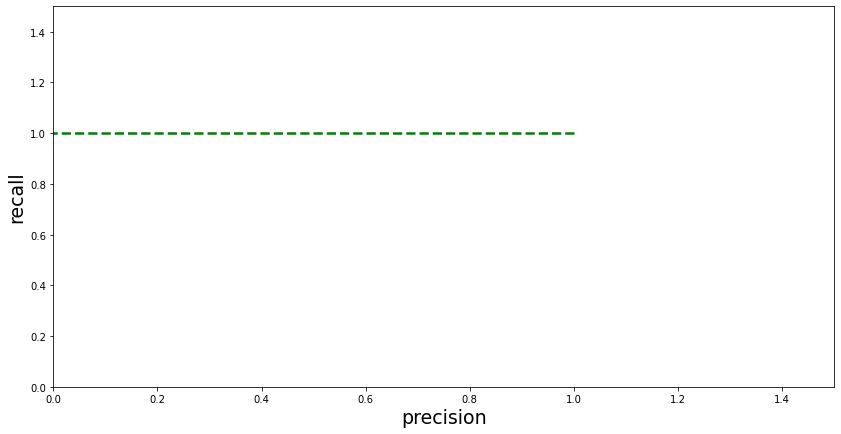

In [104]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

## Saving the model

In [106]:
import joblib
joblib.dump(AdaModel,'Census_Income.obj')

['Census_Income.obj']